**INTRODUCTION**

A data collection effort for the hashtags "CRIME" is now being carried out on Twitter. The goal of this is to have a deeper comprehension of the many viewpoints that people hold about criminal activity.

**DATA CLEANING AND VISUALIZATION**

Cleaning up the text data from Twitter is done with Python. In order to carry out an investigation into #crime, all of the columns in the dataset were taken out, leaving only the text column. This allowed for the conduct of an investigation. During this stage of the cleaning process, both the Tokenization module from the NLTK library and the Countvectorizer module from the scikit-learn library are utilized.

The following bar graph and word cloud display the results of data visualization performed on the #CRIME dataset. These display the most frequently used tweet words along with the hashtag. The wordcloud reveals that the most frequently used terms associated with the hashtag are "inflation", "breakthrough", "mass", and "dating" which provides some insight into the context in which people are using the hashtag.

IMPORT LIBRARIES

In [3]:

#Loading the required libaries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import os
import re
import warnings
from sys import exit
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import preprocessing
import pylab as pl
from sklearn import decomposition
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

IMPORT DATA

In [4]:
df = pd.read_csv("../../data/modified-data/cleaned_crime_text_data.csv")
df.head()

,text,clean text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,@WhatRickySaid @CalaVento @memestheband @HongF...,WhatRickySaid CalaVento memestheband HongFaux ...,"['whatrickysaid', 'calavento', 'memestheband',...","['whatrickysaid', 'calavento', 'memestheband',...","['whatrickysaid', 'calavento', 'memestheband',...","['whatrickysaid', 'calavento', 'memestheband',..."
1,Breakthrough in mass murder case\nhttps://t.co...,Breakthrough in mass murder case\nhttpstcoBhdF...,"['breakthrough', 'in', 'mass', 'murder', 'case...","['breakthrough', 'mass', 'murder', 'case', 'ht...","['breakthrough', 'mass', 'murder', 'case', 'ht...","['breakthrough', 'mass', 'murder', 'case', 'ht..."
2,Driven by Kerena Swan @KerenaSwan @rararesourc...,Driven by Kerena Swan KerenaSwan rararesources...,"['driven', 'by', 'kerena', 'swan', 'kerenaswan...","['driven', 'kerena', 'swan', 'kerenaswan', 'ra...","['driven', 'kerena', 'swan', 'kerenaswan', 'ra...","['driven', 'kerena', 'swan', 'kerenaswan', 'ra..."
3,Suspicious phone call? Something doesn't feel ...,Suspicious phone call Something doesnt feel ri...,"['suspicious', 'phone', 'call', 'something', '...","['suspicious', 'phone', 'call', 'something', '...","['suspici', 'phone', 'call', 'someth', 'doesnt...","['suspicious', 'phone', 'call', 'something', '..."
4,@RDTVF Donate @RDTVF #indie #internet #radio s...,RDTVF Donate RDTVF indie internet radio suppor...,"['rdtvf', 'donate', 'rdtvf', 'indie', 'interne...","['rdtvf', 'donate', 'rdtvf', 'indie', 'interne...","['rdtvf', 'donat', 'rdtvf', 'indi', 'internet'...","['rdtvf', 'donate', 'rdtvf', 'indie', 'interne..."


VISUALIZATION

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

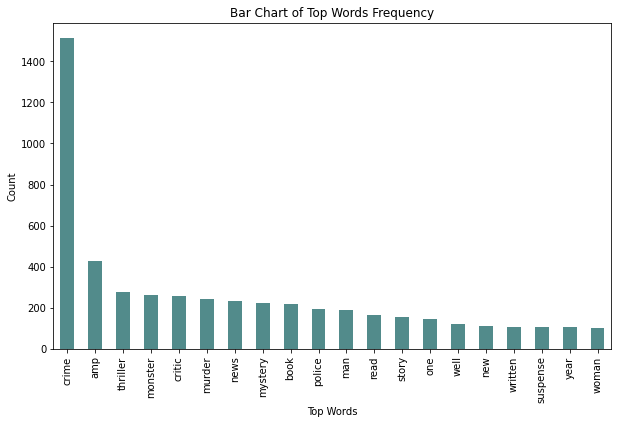

In [5]:
twitter_data = df[['Tweet_lemmatized']]
#remove retweets
twitter_data = twitter_data[~twitter_data['Tweet_lemmatized'].str.contains('rt')]
#BARGRAPH OF TOP USED WORDS IN TWEETS
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(twitter_data['Tweet_lemmatized'], 20)
twitter_data_count = pd.DataFrame(common_words, columns = ['Review', 'count'])

twitter_data_count.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency", color="#528B8B"
)

WORDCLOUD

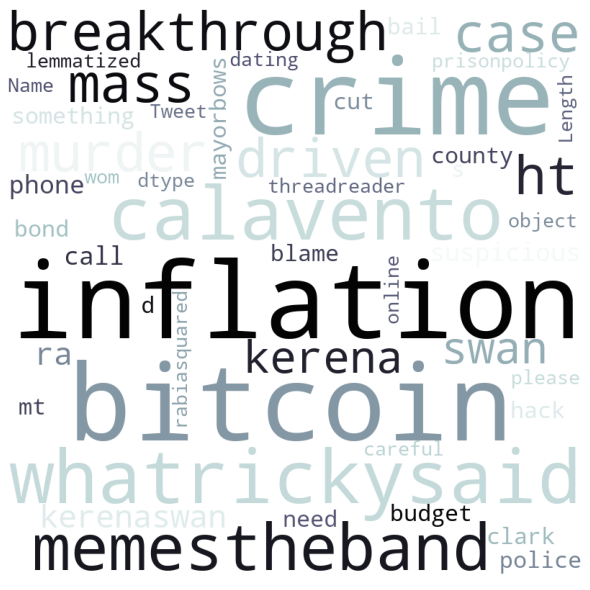

In [6]:
#WORDCLOUD OF THE #CRIME DATASETS
stopwords = set(STOPWORDS)
letters_only = re.sub("[^a-zA-Z]+", " ", str(twitter_data['Tweet_lemmatized']))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,  colormap="bone").generate(letters_only)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


COUNT OF LEMMATIZED TWEETS

In [7]:
#count tweet['lemmatized'] rows
twitter_data['Tweet_lemmatized'].count()

3297

**COUNT VECTORIZER**

The Python scikit-learn module CountVectorizer is used to turn a supplied text into a vector based on the frequency of each word that appears in the full text. This is useful when we have numerous such texts and want to transform each word to a vector for using in text analysis. CountVectorizer generates a matrix where each distinct word corresponds to a column so each text sample in the document corresponds to a row. Each cell's value is just the number of words in its respective text sample. After applying the count vectorizer, the data are restored and used for further clustering analysis.


In [8]:
#COUNTVECTORIZER
CV=CountVectorizer(input='content',
                      stop_words='english',
                      #decode_error='ignore'
                      )
The_DTM_CV=CV.fit_transform(twitter_data['Tweet_lemmatized'])
TheColumnNames_CV=CV.get_feature_names()

#regex model
pattern = r'[0-9]'

# Match all digits in the string and replace them with an empty string
New_TheColumnNames = re.sub(pattern, '', str(TheColumnNames_CV))

#The second step is to use pandas to create data frames
The_DF = pd.DataFrame(The_DTM_CV.toarray(),columns=TheColumnNames_CV)
The_DF = The_DF.filter(regex='^\D')

The_DF.to_csv("DTM_CV.csv")
#DATA AFTER COUNTVECTORIZER
filename= pd.read_csv("DTM_CV.csv")

#normalize the data
file_norm =(filename - filename.mean()) / filename.std()
filename.head()


,Unnamed: 0,aadhi,aaditya,aaftab,aaftabpoonawalla,aap,aapl,aaronovitch,aarop,aatma,...,𝗛𝗼𝘂𝘀𝗲𝘄𝗶𝗳𝗲,𝗞𝗶𝗹𝗹𝗶𝗻𝗴,𝗟𝗢𝗡𝗚,𝗢𝗡,𝗣𝗲𝘀𝘁𝗹𝗲,𝗣𝗼𝗹𝗶𝗰𝗲,𝗦𝗛𝗔𝗗𝗢𝗪,𝗦𝗧𝗔𝗚𝗘,𝗧𝗛𝗘,𝗪𝗶𝘁𝗵
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**CLUSTERING**

Clustering is the process of dividing a population or set of data points into a number of groups in such a way that the data points in each group are more similar to each other than they are to the data points in any of the other groups. This ensures that each group contains data points that are more comparable to each other than they are to the data points in any of the other groups. At its most fundamental level, it is a collection of items that are arranged in accordance with the degrees to which they are similar to or distinct from the other items in the collection. It accomplishes this by searching the unlabeled dataset for recurring patterns, such as shape, size, color, and behavior, among other things, and then dividing the data based on whether or not those recurring patterns are present or absent. Because it is an unsupervised learning approach, the algorithm does not receive any supervision, and it works with unlabeled datasets. Also, the datasets are not labeled.


**CLUSTERING ALGORITHMS:**

Clustering algorithms can be used to organize data points into groups according to the similarities they share with other data points. There is not a set of criteria that define successful clustering. Clustering is a method for categorizing data that is not pre-labeled. It is mostly dependent on the individual user as well as the circumstance.

*Common cluster models:*

- Connectivity models, which construct models based on distance connectedness.

- Centroid models, which represent each cluster with a single mean vector

- Distribution models, which model clusters using statistical distributions

- Density models, which defines clustering as a densely connected region in data space.


**KMEANS**

K-means clustering is one of the easiest and most popular algorithms for learning without being watched. A cluster is a group of data points that are put together because they have some things in common. You will set a target number, k, which is the number of centers you need in the dataset. A centroid is the place, real or made up, that represents the cluster's center. Each data point is put into one of the clusters by lowering the sum of squares for each cluster. In other words, the K-means algorithm finds k number of centers, then puts each data point in the cluster that is closest to it while keeping the centers as small as possible. The word "means" in K-means refers to taking the average of the data, or finding the center.

Advantages of k-means:

- Relatively straightforward to implement.

- Scales to big data collections.

- Guarantees convergence.

- Possibility to warm-up the positions of centroids.

- Adapts readily to new examples.

- Generalizes to clusters of various sizes and forms, including elliptical clusters.


Disadvantages of k-means:

- Choosing k manually.

- Data of varied sizes and densities are clustered.

- Clustering outliers.

- Scaling with dimension count.



**CLUSTERING WITH RANDOM HYPER - PARAMETER: KMEANS ALGORITHM**

A random K value is taken. Here, k = 3 is employed as the initial label prediction step. Once the labels have been predicted, kmeans model clustering with the same k value, k = 3, is performed to examine the clusters.

PREDICTION OF LABELS

In [9]:
# KMEANS
# Use k-means clustering on the data.
k = 3
## Sklearn required you to instantiate first
kmeans = KMeans(n_clusters=k)
kmeans.fit(filename)   ## run kmeans

labels = kmeans.labels_
print(labels)

centroids = kmeans.cluster_centers_
print(centroids)

prediction = kmeans.predict(filename)
print(prediction)

[1 1 1 ... 2 2 2]
[[ 1.64700000e+03 -2.71050543e-19 -2.71050543e-19 ... -2.71050543e-19
  -5.42101086e-19 -2.71050543e-19]
 [ 5.48500000e+02 -1.13841228e-18 -1.13841228e-18 ... -1.13841228e-18
  -2.27682456e-18  9.10746812e-04]
 [ 2.74650000e+03  9.09090909e-04  9.09090909e-04 ...  9.09090909e-04
   1.81818182e-03  1.02999206e-18]]
[1 1 1 ... 2 2 2]


KMEANS CLUSTERING FOR K = 3

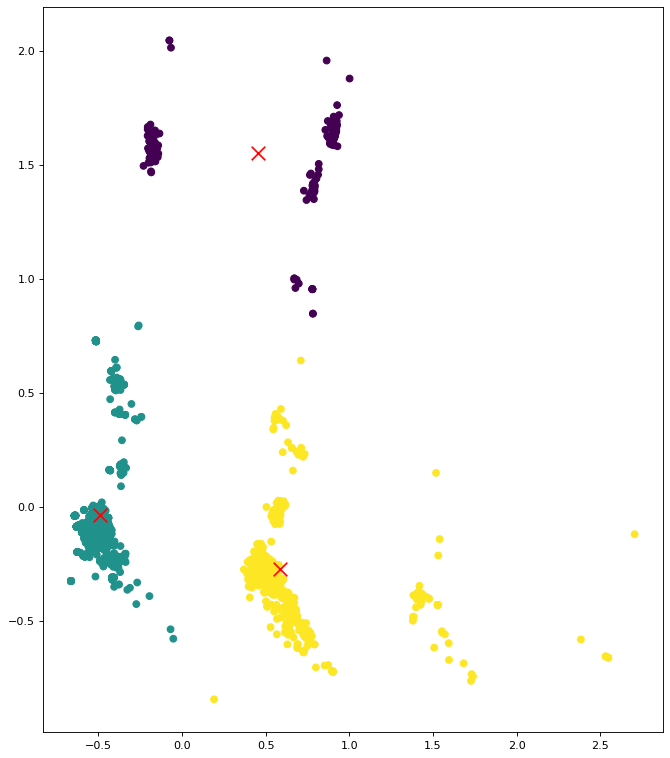

In [10]:
#Kmeans for K = 3
km = KMeans(n_clusters=3)
km.fit(The_DTM_CV)
pca = PCA(n_components=2, random_state=2)
reduced_features = pca.fit_transform(The_DTM_CV.toarray())

# reduce the cluster centers to 2D\
reduced_cluster_centers = pca.transform(km.cluster_centers_)
from matplotlib.pyplot import figure

figure(figsize=(10, 12), dpi=80)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(The_DTM_CV))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')

**HYPER-PARAMTER TUNING:**

Tuning hyper - parameters for unsupervised learning issues is typically difficult owing to the lack of validation ground truth. However, the effectiveness of the majority of clustering algorithms relies greatly on the selection of appropriate hyper - parameters. For each method that performs Clustering on a dataset, numerous hyper - parameters must be specified in advance. However, these hyper-parameters must be modified with our dataset in mind. Using random hyper - parameters that do not match our dataset could result on incorrect classification of datapoints into clusters. So, in  order to optimize their performance hyper-parameters are being used.

To do hyper-parameter tuning, we have to make functions  use a metric to try to find the best Hyper-parameter(s). This metric is different for each algorithm and each method within an algorithm. There are many ways to figure out optimal value such as the Elbow method, the Silhouette method, the Grubbs method, and so on.



**HYPER-PARAMTER TUNING FOR KMEANS:**

For K-Means Algorithm, hyper-parameter is n_cluster.
There are two metods which are being used to find the optimal value:

1. ELBOW METHOD


By fitting the model with a range of values for, the "elbow" method can help choose the best number of clusters. If the line chart looks like an arm, the "elbow," or point where the curve bends, is a good sign that the model fits best at that point. "Elbow" will be marked in the visualizer with a dashed line.

Here, the k value is considered to range from 2 to 7. When the model is fit, we can see a line on the graph that marks the "elbow," which in this case is the best number.


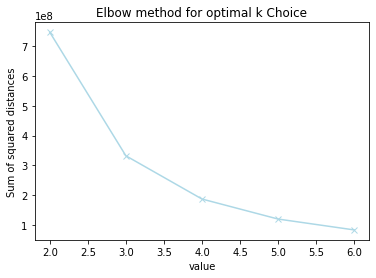

In [11]:
#Look at best values for k 
SS_dist = []

values_for_k=range(2,7)

for k_val in values_for_k:
    k_means = KMeans(n_clusters=k_val)
    model = k_means.fit(filename)
    SS_dist.append(k_means.inertia_)
    

plt.plot(values_for_k, SS_dist, 'bx-', color='lightblue')
plt.xlabel('value')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k Choice')
plt.show()


2. SILHOUETTE METHOD


The silhouette method can also be used to find the best number of clusters or other hyper-parameters and to check that the data in each cluster is consistent. This method figures out silhouette coefficients for each sample point and takes the average of all of them to get the silhouette score. It picks the set of hyper-parameters with the highest silhouette score. The silhouette value is a way to compare how similar an object is to other objects in its own cluster (separation).

Here, the k value is considered to range from 2 to 7. When the model is fit, we can see a line on the graph that marks the "silhouette," which in this case is the best number.

Text(0.5, 0, 'k values')

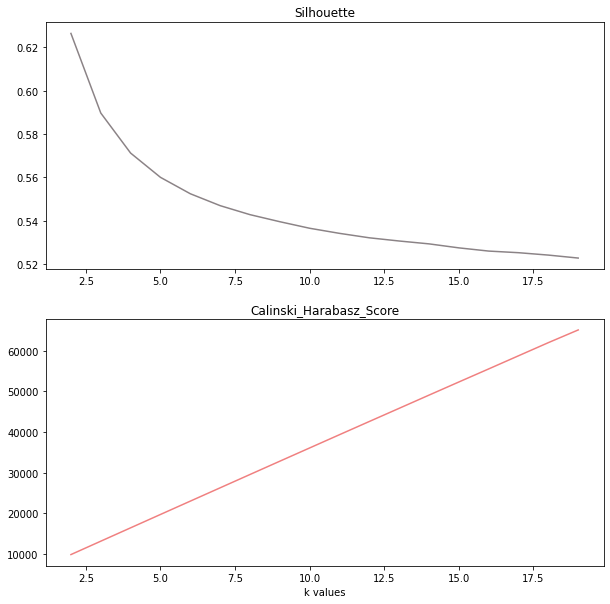

In [12]:
# Look at Silhouette
Sih=[]
Cal=[]
k_range=range(2,20)

for k in k_range:
    k_means_n = KMeans(n_clusters=k)
    model = k_means_n.fit(filename)
    Pred = k_means_n.predict(filename)
    labels_n = k_means_n.labels_
    R1=metrics.silhouette_score(filename, labels_n, metric = 'euclidean')
    R2=metrics.calinski_harabasz_score(filename, labels_n)
    Sih.append(R1)
    Cal.append(R2)


fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax1.plot(k_range,Sih, color="#8B8386")
ax1.set_title("Silhouette")
ax1.set_xlabel("")

ax2.plot(k_range,Cal, color='#F08080')
ax2.set_title("Calinski_Harabasz_Score")
ax2.set_xlabel("k values")


From the above methods, the optimal value is taken as 2 i.e. k = 2. Considering k =2, the data is fit into the k-means algorithm and proceeding with the scatter plot. Principal component analysis (PCA) is a way to reduce the number of dimensions in these kinds of datasets, making them easier to understand while losing as little information as possible. It does this by making new variables that are not related to each other and that gradually optimize variance.

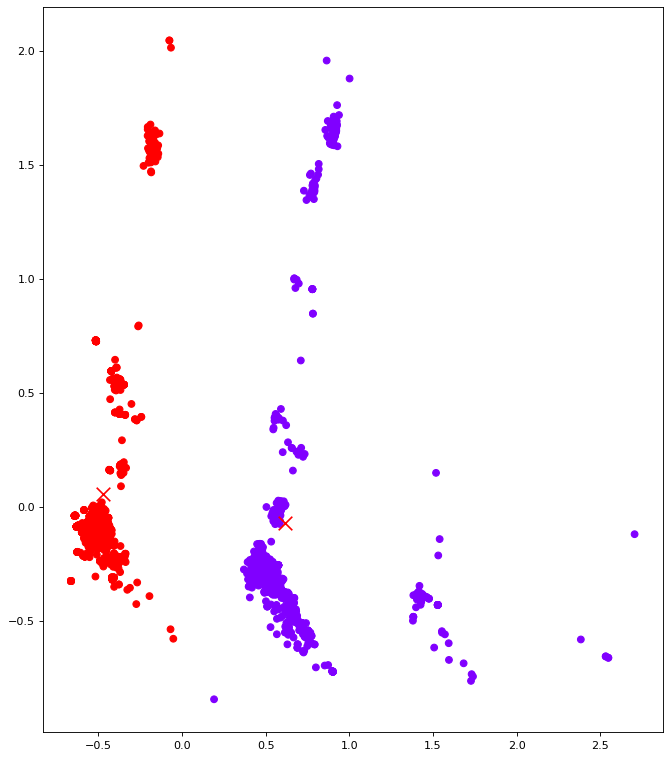

In [13]:
#Kmeans for K = 2
km = KMeans(n_clusters=2)
km.fit(The_DTM_CV)
pca = PCA(n_components=2, random_state=2)
reduced_features = pca.fit_transform(The_DTM_CV.toarray())

# reduce the cluster centers to 2D\
reduced_cluster_centers = pca.transform(km.cluster_centers_)
from matplotlib.pyplot import figure

figure(figsize=(10, 12), dpi=80)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(The_DTM_CV), cmap='rainbow')
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r', cmap='rainbow')

**DBSCAN: Density-Based Spatial Clustering of Applications with Noise**

DBSCAN is an algorithm for density-based clustering that takes as its premise the idea that clusters are clumps of data that are physically separated by less dense areas. Specifically, it creates a cluster out of 'densely clustered' data points. By inspecting the regional density of the data points, it can locate groups in massive spatial datasets. DBSCAN clustering's intriguing characteristic is its resistance to outliers. Unlike K-Means, where we have to provide the number of centroids, it does not require us to know the number of clusters in advance.

The DBSCAN algorithm is described in detail below:

- DBSCAN generates its initial data point at random (non-visited points).

- This point's neighborhood is extracted using an epsilon distance.

- If there are enough data points in this region, the clustering mechanism initiates, and the current data point becomes the first point in the newest cluster; otherwise, it is classified as noise and is subsequently visited.

- Every other point within epsilon distance of the first point in the new cluster likewise joins it as a member of the same cluster. The steps taken to ensure that all previously added data points are also part of the same cluster are repeated for all newly added data points.

- The preceding two procedures are continued until all cluster nodes are identified. All of the points in the cluster's immediate neighborhood have been explored and categorized. When we've finished with the current cluster, we'll move on to the next one by retrieving and processing a previously unvisited point. This process is carried out until all of the data points have been checked off as visited.

Advantages of DSCAN:

- Doesn't need the number of clusters to be set up front.

- Able to tell when data is just noise while clustering.

- The DBSCAN algorithm can find clusters that are any size and any shape.

Disadvantages of DBSCAN:

- When clusters have different densities, the DBSCAN algorithm doesn't work.

- Fails if the dataset is a neck type.


In DBSCAN, the hyperparameters are Min points and epsilon.

- Min points: Min points ≥ dimensionality +1

If the set of data is more noisy, we use Min. Points are bigger because it's easy to get rid of noisy ones.

- Radius (Epsilon): Elbow method

We figure out the distance between each data point and then sort distances from farthest to closest, and then draw a graph between distance and point index. From the graph,we choose the best distance (epsilon) where the graph shows a sharp rise.





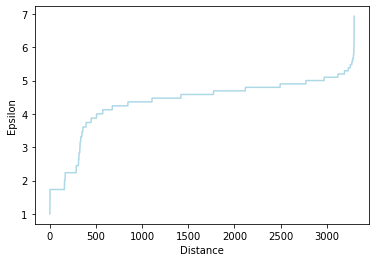

In [14]:
# we use nearestneighbors for calculating distance between points
from sklearn.neighbors import NearestNeighbors

# calculating distances
neigh=NearestNeighbors(n_neighbors=2)
distance=neigh.fit(filename)
# indices and distance values
distances,indices=distance.kneighbors(filename)
# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)
# sorted distances
sorted_distances=sorting_distances[:,1]
# plot between distance vs epsilon
plt.plot(sorted_distances, color='lightblue')
plt.xlabel("Distance")
plt.ylabel("Epsilon")
plt.show()

Epsilon optimization
If we look at the graph, we can see that at epsilon, there are 6 sharp rises, so we choose epsilon(radius) to be 6.

Utilizing optimized hyperparameters when configuring DBSCAN. After determining the total number of clusters, we depict the corresponding point counts for each cluster in the section below. In the end, for eps=6 and min_samples = 2 the labels are predicted and DSCAN clusters are displayed.

NUMBER OF POINTS ON EACH CLUSTER

In [15]:
MyDBSCAN = DBSCAN(eps=6, min_samples=2)
MyDBSCAN.fit_predict(filename)
#count the number of points in each cluster
from collections import Counter
Counter(MyDBSCAN.labels_)
#-1 means noise

Counter({0: 3295, -1: 2})

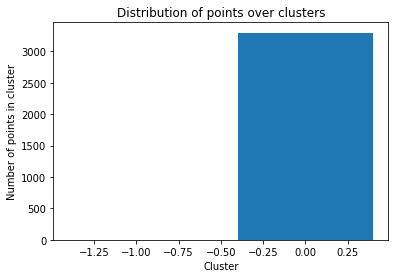

In [16]:
#plot the counter
plt.bar(Counter(MyDBSCAN.labels_).keys(), Counter(MyDBSCAN.labels_).values())
#labels for the graph
plt.xlabel('Cluster')
plt.ylabel('Number of points in cluster')
plt.title('Distribution of points over clusters')
plt.show()
#-1 means noise

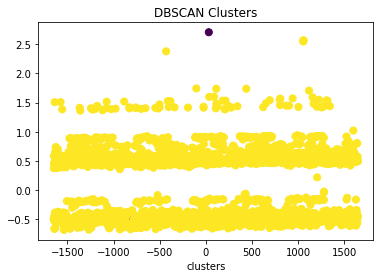

In [17]:
from collections import Counter
labels_DB = MyDBSCAN.labels_
Counter(labels_DB)
#plot clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(filename)
X_pca = pca.transform(filename)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_DB, s=50)
plt.xlabel('clusters')
plt.title('DBSCAN Clusters')
plt.show()


In [18]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(filename, labels_DB))

Silhouette Coefficient: -0.210


**HIERARCHIAL CLUSTERING**

In order to construct layered clusters, hierarchical clustering algorithms repeatedly combine and divide existing clusters. As a tree, this structure depicts the relative hierarchy of the groups (or dendrogram). The single cluster that contains all of the others serves as the tree's trunk, while the many other clusters that each contain exactly one sample serve as the tree's leaves.

Agglomerative hierarchical clustering (AHC):

With the AgglomerativeClustering object, you may do hierarchical clustering from the bottom up, meaning that each observation is placed in its own cluster before being combined with others. While AgglomerativeClustering can scale to a large number of samples when used in conjunction with a connectivity matrix, it incurs a high computational cost when no connection constraints are placed between samples since it considers all possible mergers at each step.

Advantages of AHC:

- AHC is easy to set up, and it can also arrange objects in a way that is helpful for the display.

- We don't have to know ahead of time how many clusters there will be. By cutting the dendrogram at a certain level, it's easy to figure out how many clusters there are.

- In the AHC method, smaller groups of data will be put together, which may show similarities.

Disadvantages of AHC:

- If you group the objects wrong in any of the first steps, you can't go back and fix it.

- Hierarchical clustering algorithms don't give a unique way to divide the dataset, but they do give a hierarchy that can be used to choose which clusters to use.

- They don't do a good job with outliers. When outliers are found, they can lead to the formation of a new cluster or the merging of two or more clusters.


There are two key concepts in hierarchical clustering:

- The bottom-up implementation of this algorithm is described above. Another option is to work from the top down, initially placing all data points in the same cluster before recursively splitting them into their own groups.

- Clusters are merged based on how near they are to one another.



Here,The Euclidean distance between the points is used to do aglomerative clustering for 4 clusters. Followed by prediction of labels and plotting dendrogram for the data.

LABELS

In [19]:
##  Hierarchical 

MyHC = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
FIT=MyHC.fit(filename)
HC_labels = MyHC.labels_
print(HC_labels)


[2 2 2 ... 3 3 3]


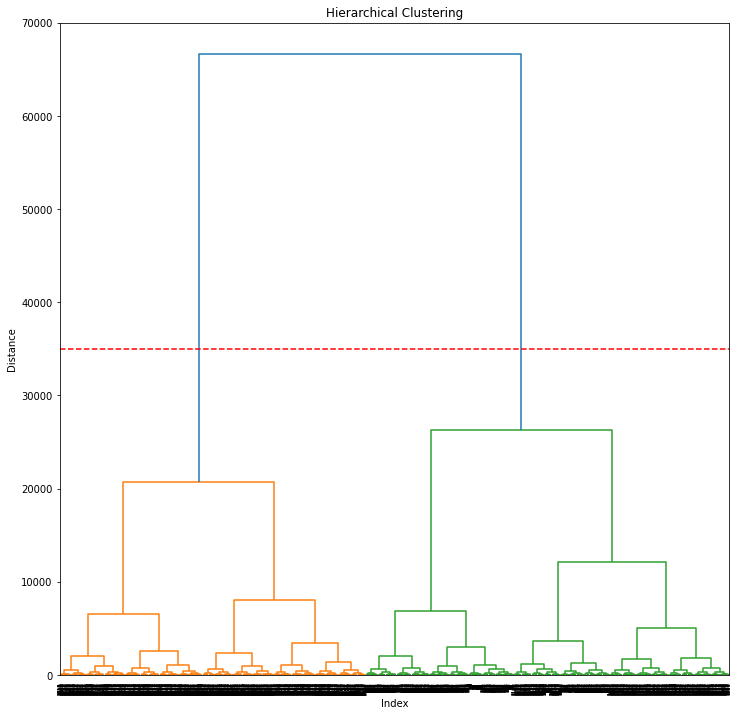

In [20]:
#plot hierarchical clusters
plt.figure(figsize =(12, 12))
plt.title('Hierarchical Clustering')
dendro = hc.dendrogram((hc.linkage(filename, method ='ward')))
plt.axhline(y=35000, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


**RESULTS**

- From the Kmeans Algorithm, the dataset is 2 groups using the unsupervised k-means algorithm.
- From the DBSCAN Algorithm, the Silhouette Coefficient is 0.069, which means that the clusters are overlapping because the value is near 0.
- From Hierarchical Algorithm, the Euclidean distance method was used to make a dendrogram with k = 4. As can be seen, the clusters are very close to each other. It shows words that go together well, and similar words could be used in different tweets.The red dotted line indicates that the number of cluster is 2.



**CONCLUSION**

From the clusters formed for the #CRIME twitter data, we can say that  due to the enormous volume of the data and the possibility of similar words appearing in different tweets, the clusters are overlapping and not defined; however, this situation has room for further improvement.